In [1]:
import sys

sys.path.append('../')

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

from straindesignxai.main import DataLoader

path = '../data/EDD_isoprenol_production.csv'

input_var = ['ACCOAC', 'MDH', 'PTAr', 'CS', 'ACACT1r', 'PPC', 'PPCK', 'PFL']
response_var = ['Value']

d = DataLoader(path, input_var, response_var)

Dataset size: (96, 9)


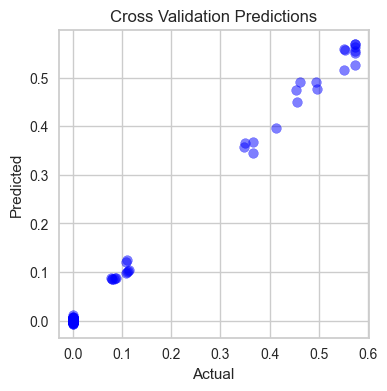

In [2]:
d.train_xgb()
d.plot_R2()

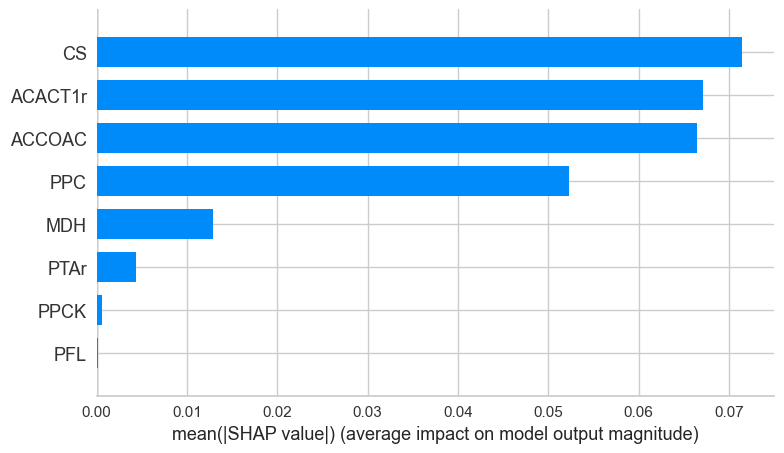

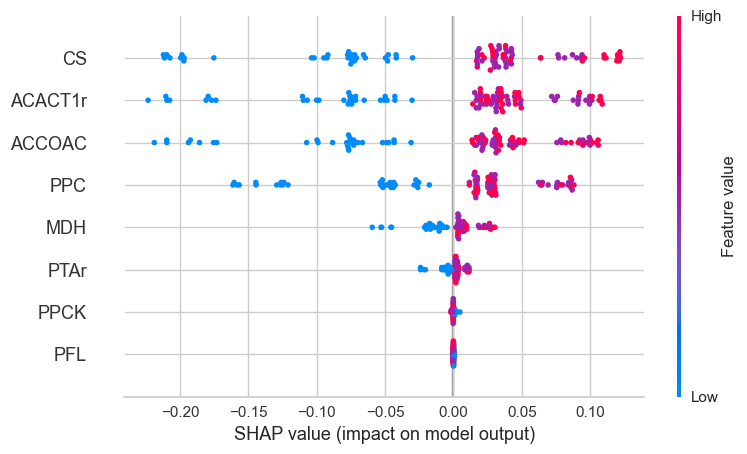

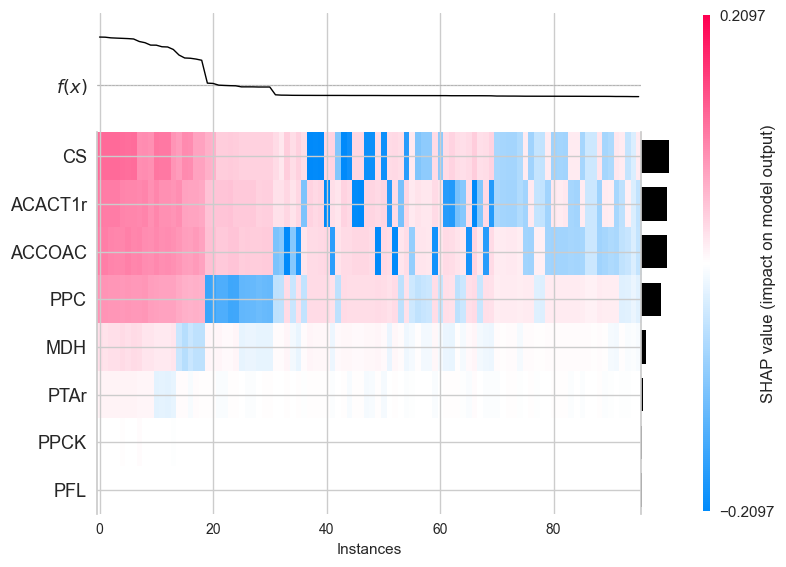

In [3]:
d.get_shap_values()

In [8]:
d.shap_df.sort_values(by='y', ascending=False)

,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,cluster,y
6,0.105966,0.024176,0.011382,0.121211,0.107895,0.088132,0.001023,-0.000355,0,0.572648
48,0.100226,0.027162,0.010097,0.121548,0.106608,0.085954,0.001519,-0.000063,0,0.572648
66,0.101315,0.028163,0.009598,0.093147,0.096894,0.083920,0.004745,-0.000063,0,0.572648
45,0.105836,0.026411,0.011382,0.122183,0.108810,0.086872,-0.000732,-0.000063,0,0.572648
40,0.098928,0.030329,0.010097,0.120272,0.099484,0.084348,-0.001399,-0.000063,0,0.572648
...,...,...,...,...,...,...,...,...,...,...
42,-0.075936,0.003816,0.001560,0.017750,-0.075624,0.017453,-0.000165,-0.000075,6,0.000000
41,0.018273,0.003794,0.001768,-0.074590,-0.076938,0.017376,0.000559,-0.000085,3,0.000000
10,-0.209726,0.007377,0.002775,0.031395,0.031079,0.030983,0.001134,0.000158,5,0.000000
36,0.021830,-0.009523,0.001223,-0.094854,0.023330,-0.047452,0.000092,-0.000047,3,0.000000


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

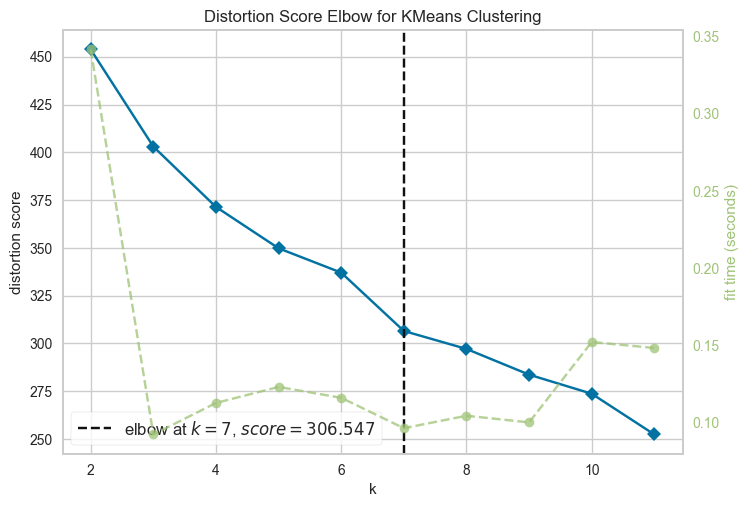

Optimal number of clusters: 7
Number of elements in each cluster: 
3    23
0    19
1    13
4    12
5    12
2     9
6     8
Name: cluster, dtype: int64


KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value
cluster,,,,,,,,,
0,1.473684,1.157895,1.052632,1.631579,1.368421,1.315789,1.000000,1.052632,0.489407
1,1.538462,0.846154,1.153846,1.615385,0.000000,0.923077,1.153846,1.000000,0.000000
2,1.222222,1.333333,0.666667,0.000000,1.777778,1.777778,1.222222,0.666667,0.000000
3,0.826087,0.956522,0.956522,0.000000,0.826087,0.913043,1.000000,1.000000,0.000000
4,1.583333,0.750000,1.083333,1.166667,1.500000,0.000000,0.916667,1.000000,0.096391
5,0.000000,0.833333,0.833333,1.416667,1.416667,1.000000,0.916667,0.833333,0.000000
6,0.000000,1.250000,1.250000,1.500000,0.000000,1.125000,0.875000,1.500000,0.000000


In [4]:
d.supervised_clustering()
d.study_clusters()

In [5]:
d.study_clusters('most_frequent')

Number of elements in each cluster: 
3    23
0    19
1    13
4    12
5    12
2     9
6     8
Name: cluster, dtype: int64


,ACCOAC,MDH,PTAr,CS,ACACT1r,PPC,PPCK,PFL,Value
cluster,,,,,,,,,
0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,0.552101
1,2.0,0.0,2.0,2.0,0.0,0.0,2.0,2.0,0.000000
2,1.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,0.000000
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.000000
4,2.0,0.0,2.0,1.0,1.0,0.0,1.0,1.0,0.080117
5,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,0.000000
6,0.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,0.000000


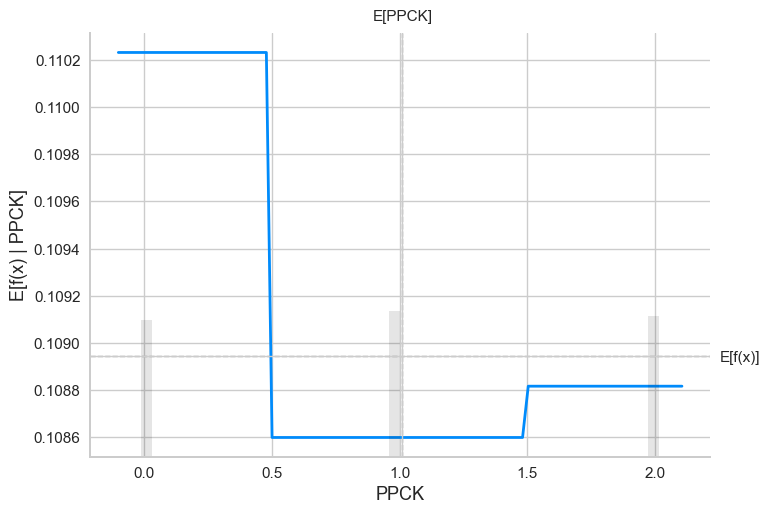

In [10]:
d.pdplot('PPCK')